Studio sugli aeroporti di NewYork

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [25]:
df = pd.read_csv('dataset/2012.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/2012.csv'

In [3]:
filtered_df = df[['FL_DATE', 'DEP_DELAY', 'ARR_DELAY', 'ORIGIN', 'DEST', 'DISTANCE', 'AIR_TIME']]

print(filtered_df.head())


NameError: name 'df' is not defined

In [23]:
ny_airports = ['LAX']
filtered_df['FL_DATE'] = pd.to_datetime(filtered_df['FL_DATE'])
ny_flights_depatures = filtered_df[
    (filtered_df['ORIGIN'].isin(ny_airports)) & 
    (filtered_df['AIR_TIME'].notna())
]
ny_flights_arrivals = filtered_df[
    (filtered_df['DEST'].isin(ny_airports)) & 
    (filtered_df['AIR_TIME'].notna())
]

print(ny_flights_depatures.head())
print(ny_flights_arrivals.head())

NameError: name 'filtered_df' is not defined

In [49]:
# identifichiamo la settimana

daily_departures = ny_flights_depatures.groupby('FL_DATE').size().reset_index(name='DEPARTURES')
daily_arrivals = ny_flights_arrivals.groupby('FL_DATE').size().reset_index(name='ARRIVALS')
daily_traffic = pd.merge(daily_departures, daily_arrivals, on='FL_DATE', how='outer').fillna(0)

daily_traffic['TOTAL_TRAFFIC'] = daily_traffic['DEPARTURES'] + daily_traffic['ARRIVALS']

print(daily_traffic.head())
print(ny_flights_depatures.head())
print(ny_flights_arrivals.head())



     FL_DATE  DEPARTURES  ARRIVALS  TOTAL_TRAFFIC
0 2012-01-01         2.0       1.0            3.0
1 2012-01-02         2.0       3.0            5.0
2 2012-01-03         2.0       5.0            7.0
3 2012-01-04         2.0       0.0            2.0
4 2012-01-05         3.0       2.0            5.0
         FL_DATE  DEP_DELAY  ARR_DELAY ORIGIN DEST  DISTANCE  AIR_TIME  WEEK
35323 2012-01-01       -6.0      -23.0    LGA  MKE     738.0     111.0    52
35331 2012-01-01       -5.0      -10.0    EWR  BWI     169.0      40.0    52
35357 2012-01-02      199.0      143.0    JFK  LAX    2475.0     318.0     1
35370 2012-01-02       -7.0       19.0    JFK  ORF     290.0      54.0     1
35390 2012-01-03       51.0       57.0    EWR  BQN    1585.0     208.0     1
         FL_DATE  DEP_DELAY  ARR_DELAY ORIGIN DEST  DISTANCE  AIR_TIME  WEEK
35346 2012-01-01       32.0       28.0    HOU  EWR    1411.0     172.0    52
35351 2012-01-02       70.0       46.0    MCO  JFK     944.0     109.0     1
35353 2

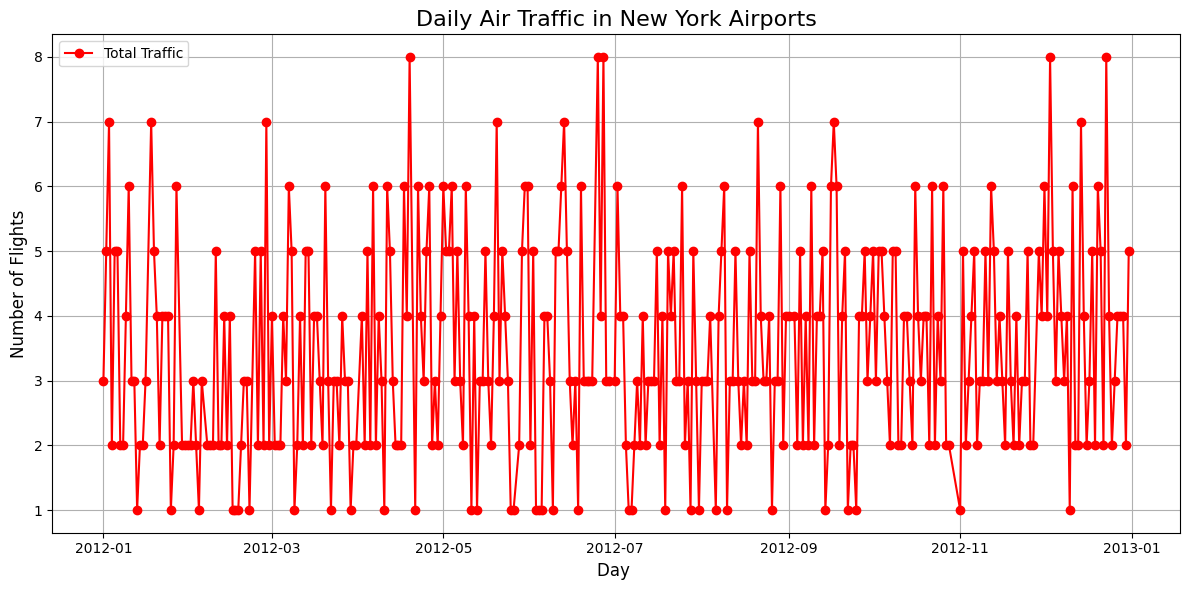

In [51]:
plt.figure(figsize=(12, 6))
#plt.plot(daily_traffic['FL_DATE'], daily_traffic['DEPARTURES'], marker='o', linestyle='-', color='b', label='Departures')
#plt.plot(daily_traffic['FL_DATE'], daily_traffic['ARRIVALS'], marker='o', linestyle='--', color='g', label='Arrivals')
plt.plot(daily_traffic['FL_DATE'], daily_traffic['TOTAL_TRAFFIC'], marker='o', linestyle='-', color='r', label='Total Traffic')
plt.title('Daily Air Traffic in New York Airports', fontsize=16)
plt.xlabel('Day ', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Studio sulle migliori rotte

In [5]:
rotte = pd.read_csv('dataset/best_route_flights.csv')

In [44]:
rotte.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2009-01-01,UA,133,SFO,LAX,900.0,858.0,-2.0,20.0,918.0,...,98.0,80.0,56.0,337.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-01,UA,817,SFO,LAX,1112.0,1104.0,-8.0,10.0,1114.0,...,98.0,78.0,54.0,337.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-01,UA,844,SFO,LAX,1536.0,1541.0,5.0,13.0,1554.0,...,88.0,75.0,55.0,337.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-01,UA,858,SFO,LAX,953.0,1006.0,13.0,16.0,1022.0,...,98.0,78.0,53.0,337.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-01,UA,888,SFO,LAX,1020.0,1014.0,-6.0,15.0,1029.0,...,98.0,75.0,53.0,337.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
rotte = rotte[['FL_DATE', 'DEP_DELAY', 'ARR_DELAY', 'ORIGIN', 'DEST', 'DISTANCE', 'AIR_TIME']]

print(rotte.head())

      FL_DATE  DEP_DELAY  ARR_DELAY ORIGIN DEST  DISTANCE  AIR_TIME
0  2009-01-01       -2.0      -20.0    SFO  LAX     337.0      56.0
1  2009-01-01       -8.0      -28.0    SFO  LAX     337.0      54.0
2  2009-01-01        5.0       -8.0    SFO  LAX     337.0      55.0
3  2009-01-01       13.0       -7.0    SFO  LAX     337.0      53.0
4  2009-01-01       -6.0      -29.0    SFO  LAX     337.0      53.0


In [7]:
rotte['FL_DATE']= pd.to_datetime(rotte['FL_DATE'])
daily_analysis = rotte.groupby("FL_DATE").agg(
    TOTAL_DEP_DELAY=("DEP_DELAY","mean"),
    TOTAL_ARR_DELAY=("ARR_DELAY", "mean"),
    AVG_AIR_TIME=("AIR_TIME", "mean"),  # Tempo medio di volo
).fillna(0) 

print(daily_analysis)

            TOTAL_DEP_DELAY  TOTAL_ARR_DELAY  AVG_AIR_TIME
FL_DATE                                                   
2009-01-01        12.103448         0.896552     55.275862
2009-01-02        51.939394        46.030303     54.484848
2009-01-03         1.285714        -5.857143     56.821429
2009-01-04         8.181818        -5.333333     52.696970
2009-01-05        29.242424        17.363636     50.212121
...                     ...              ...           ...
2018-12-27        15.560976        15.585366     52.097561
2018-12-28        10.292683        10.243902     53.975610
2018-12-29         4.441176        -1.970588     55.205882
2018-12-30         2.829268         0.243902     52.439024
2018-12-31         3.406250        -3.781250     52.656250

[3590 rows x 3 columns]


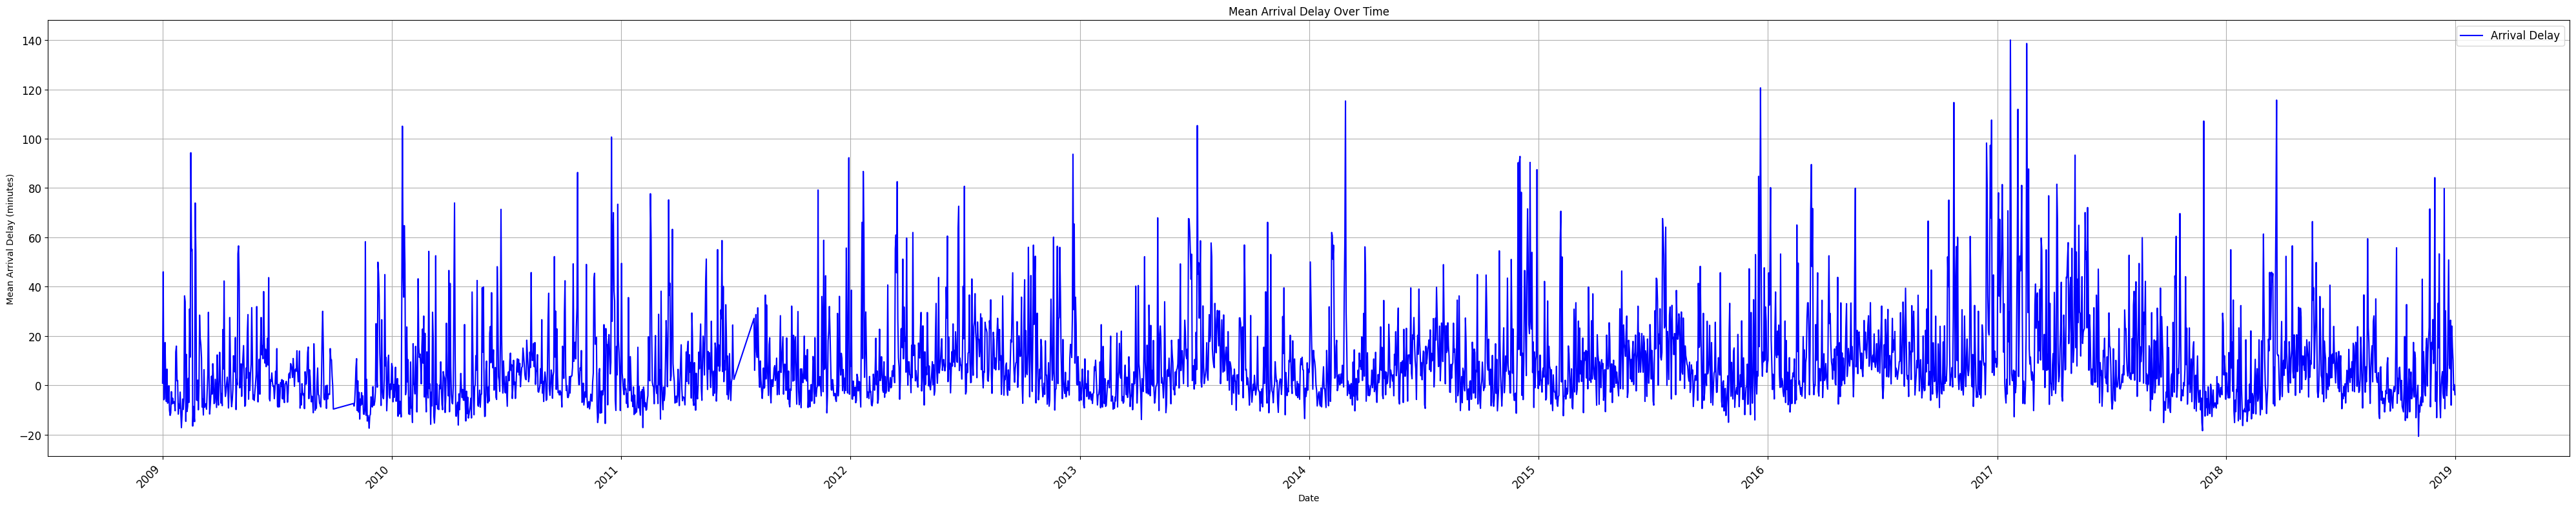

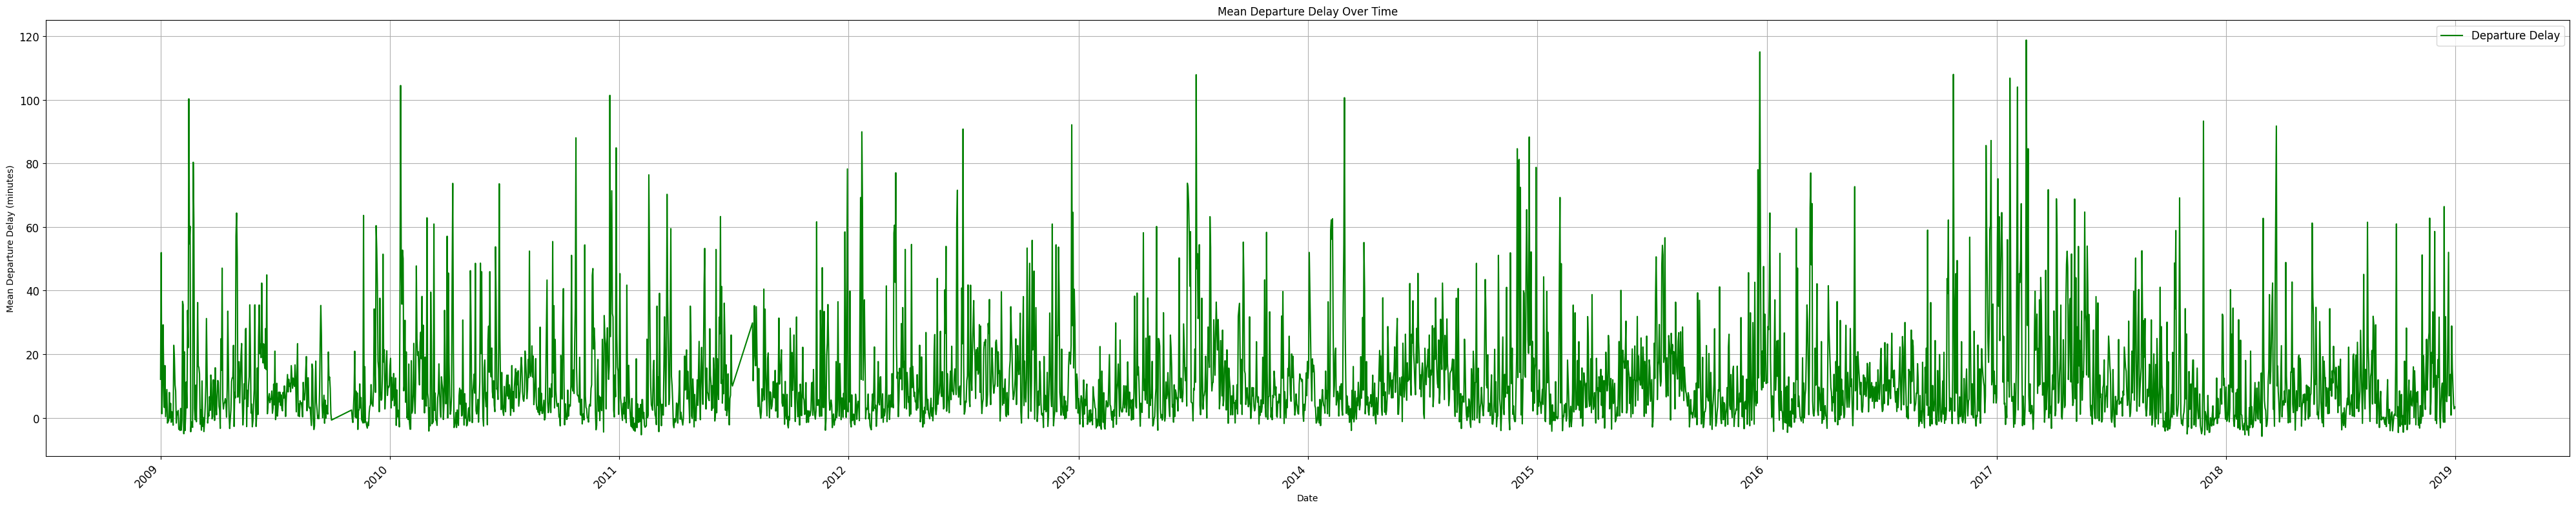

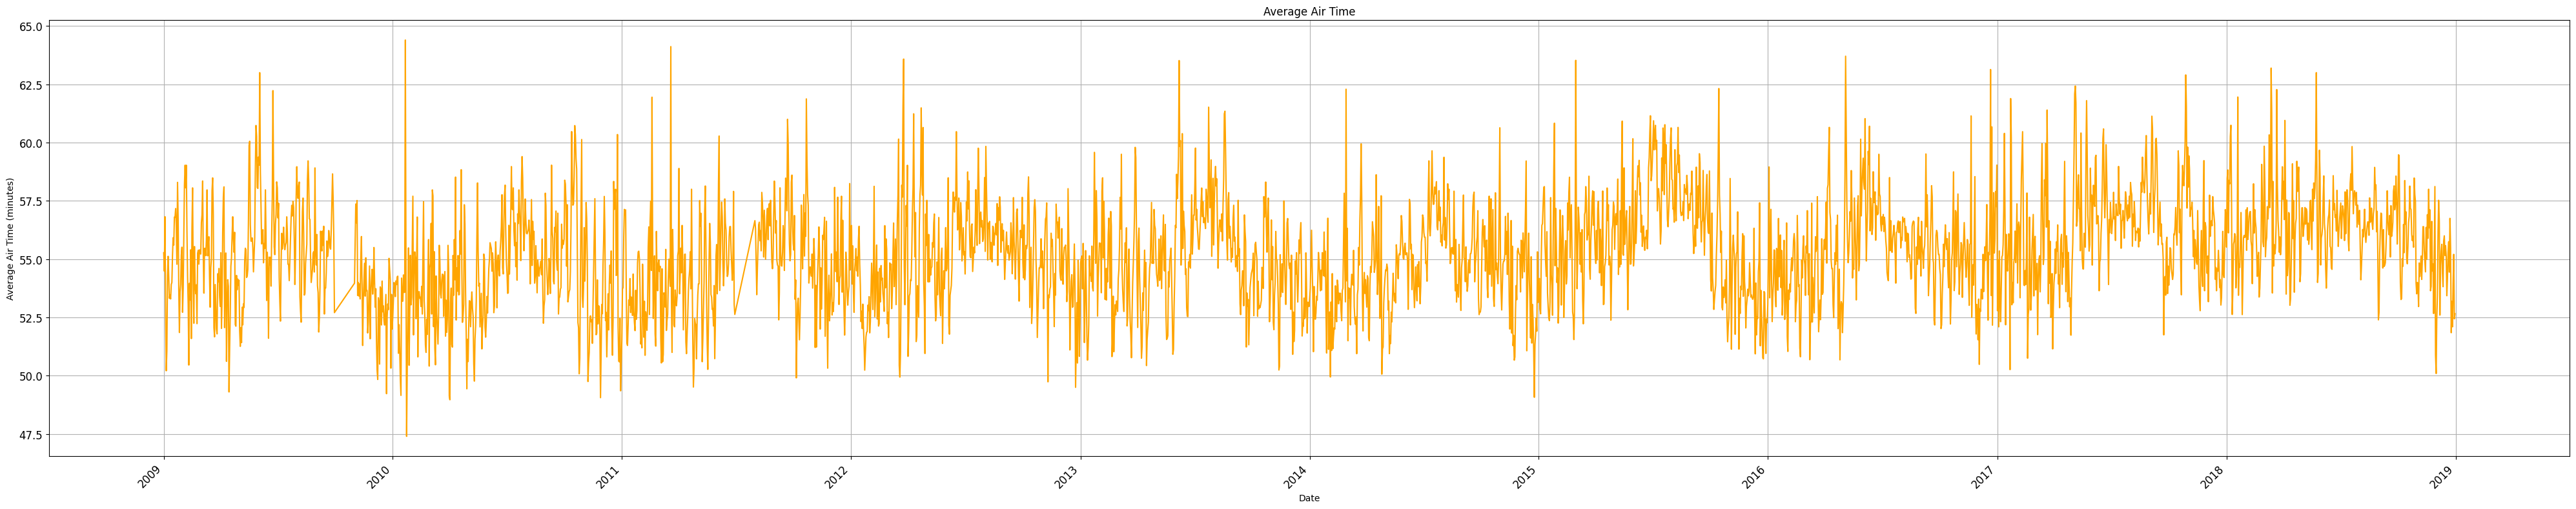

In [8]:

# Grafico del ritardo totale nel tempo (partenza e arrivo)
daily_analysis["TOTAL_ARR_DELAY"].plot(
    figsize=(40, 8), linestyle='-', color='b', 
    title="Mean Arrival Delay Over Time", grid=True, 
    xlabel="Date", ylabel="Mean Arrival Delay (minutes)", label="Arrival Delay"
)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



# Grafico del ritardo totale in partenza nel tempo
daily_analysis["TOTAL_DEP_DELAY"].plot(
    figsize=(40, 8), linestyle='-', color='g', 
    title="Mean Departure Delay Over Time", grid=True, 
    xlabel="Date", ylabel="Mean Departure Delay (minutes)", label="Departure Delay"
)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Grafico della media del tempo di volo
daily_analysis["AVG_AIR_TIME"].plot(
    figsize=(40, 8), color='orange', 
    title="Average Air Time", grid=True, 
    xlabel="Date", ylabel="Average Air Time (minutes)"
)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



<Axes: xlabel='FL_DATE'>

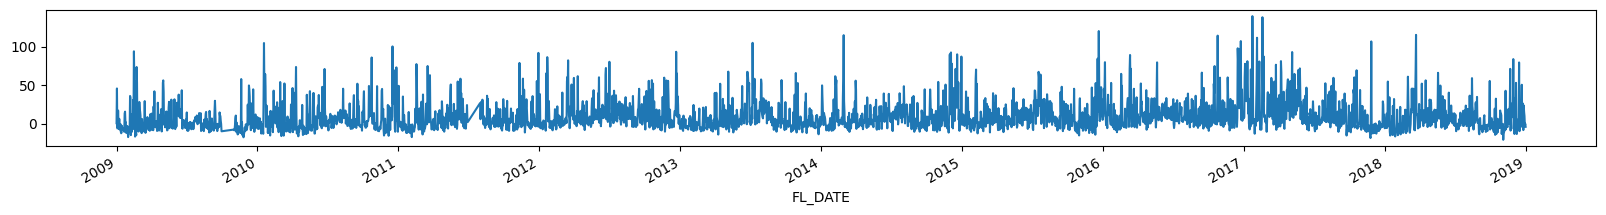

In [9]:
forNo2 = daily_analysis['TOTAL_ARR_DELAY']
forNo2.plot(figsize=(20, 2))

In [ ]:
y = daily_analysis['TOTAL_ARR_DELAY']

""" # Dividi i dati in training e testing

test = y[int(0.8 * len(y)):]   # 20% testing """

# Costruzione del modello AR(1)
model = sm.tsa.SARIMAX(y, order=(1, 0, 0), trend='n')  # AR(1), no trend
results = model.fit()

# Stima dei parametri
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:        TOTAL_ARR_DELAY   No. Observations:                 3590
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -15528.098
Date:                Fri, 22 Nov 2024   AIC                          31060.196
Time:                        10:57:56   BIC                          31072.568
Sample:                             0   HQIC                         31064.605
                               - 3590                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4964      0.011     46.920      0.000       0.476       0.517
sigma2       334.6455      4.065     82.314      0.000     326.677     342.614
Ljung-Box (L1) (Q):                  98.82   Jarque-

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [22]:
y = y.asfreq('D')
print(y.index)


DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='FL_DATE', length=3652, freq='D')


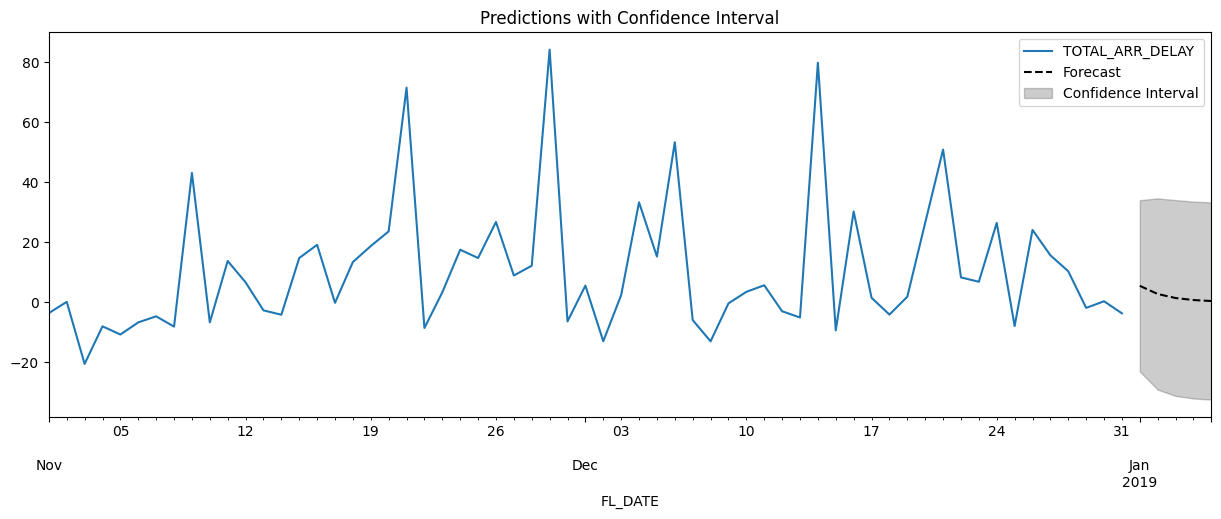

In [51]:
# Imposta una frequenza per i dati storici
y = y.asfreq('D')

# Previsioni
forecast = results.get_forecast(steps=5)
fcast = forecast.summary_frame(alpha=0.10)
forecast_idx = pd.date_range(start=y.index[-1] + pd.Timedelta(days=1), periods=5, freq='D')
fcast.index = forecast_idx

# Grafico
fig, ax = plt.subplots(figsize=(15, 5))
y.loc['2018-11-01':].plot(ax=ax) # Data per rendere visibile la predizione
fcast['mean'].plot(ax=ax, style='k--', label='Forecast')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.2, label='Confidence Interval')
plt.legend()
plt.title("Predictions with Confidence Interval")
plt.show()


In [52]:
nforecasts = 5
forecasts = {}

# Settiamo il numero di elementi del training set considerando di prendere l'80% dei dati a disposizione
d_len = len(y)
train = int(0.8 * len(y))  # 80% training

# Creiamo il modello per il training
init_training_y = y.iloc[:train]
mod = sm.tsa.SARIMAX(init_training_y, order=(2, 0, 0), trend='c')
res = mod.fit()

# Salviamo il forecast iniziale
forecasts[init_training_y.index[-2]] = res.forecast(steps=nforecasts)

# Andiamo avanti per i vari componenti del campione
for t in range(train, d_len):
    # aggiorniamo il risultato con l'append della nuova osservazione
    updated_y = y.iloc[t:t+1]
    res = res.append(updated_y, refit=False)
    # Salviasmo il nuovo insieme di forecasts
    forecasts[updated_y.index[0]] = res.forecast(steps=nforecasts)

# Mettiamo insieme tutti i forecasts in un dataframe
forecasts = pd.concat(forecasts, axis=1)

print(forecasts.iloc[:5, :5])

            2016-12-29  2016-12-31  2017-01-01  2017-01-02  2017-01-03
2016-12-31    9.803318         NaN         NaN         NaN         NaN
2017-01-01    9.551601    8.731507         NaN         NaN         NaN
2017-01-02    9.396283    8.960357    8.979161         NaN         NaN
2017-01-03    9.327848    9.128274    9.138269   26.320125         NaN
2017-01-04    9.294763    9.199400    9.203977   18.337094   35.597798


In [53]:
# Calcoliamo l'errore del forecast
forecast_errors = forecasts.apply(lambda column: y - column).reindex(forecasts.index)
# Re-indicizziamo i forecasts 
def flatten(column):
    return column.dropna().reset_index(drop=True)

flattened = forecast_errors.apply(flatten)
flattened.index = (flattened.index + 1).rename('horizon')

print(flattened.iloc[:3, :5])

         2016-12-29  2016-12-31  2017-01-01  2017-01-02  2017-01-03
horizon                                                            
1         -2.458491    0.056372   51.508018   51.744391    0.549261
2         -0.763722   51.526823   68.926247   17.809965   44.721549
3         51.090897   68.936242   26.943082   53.896579   14.050002


In [54]:
# Calcoliamo lo squarto quadratico medio
rmse = (flattened**2).mean(axis=1)**0.5

print(rmse)

horizon
1    20.369499
2    21.374849
3    21.693268
4    21.752873
5    21.719203
dtype: float64
